In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [3]:
# 1. Load Dataset
df = pd.read_csv("email_spam_dataset.csv")

df.head()

,Num_Emails,Num_Links,Num_Caps,Msg_Length,Num_Attach,Spam
0,102,14,0,257,0,0
1,179,3,0,233,0,0
2,92,14,7,166,0,1
3,14,5,6,435,1,0
4,106,1,1,106,2,0


In [4]:
# 2. Define features and target
x = df.drop("Spam", axis=1)
y = df["Spam"]

In [5]:
# 3. Train test split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3 , random_state=42)

In [ ]:
# 4. Train Decision Tree (Entropy)

model = DecisionTreeClassifier(criterion="entropy", random_state=42, max_depth=4)
model.fit(x_train, y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [15]:
# 5. Predictions and Evaluation
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)

# ConfusionMatrixDisplay(cm, display_labels=['Not Spam', 'Spam']).plot(cmap="Blues")
# plt.title("Decision Tree Confusion Matrix")
# plt.show()

print(cm)

[[190  25]
 [ 28  57]]


In [8]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90       215
           1       0.80      0.60      0.68        85

    accuracy                           0.84       300
   macro avg       0.83      0.77      0.79       300
weighted avg       0.84      0.84      0.84       300



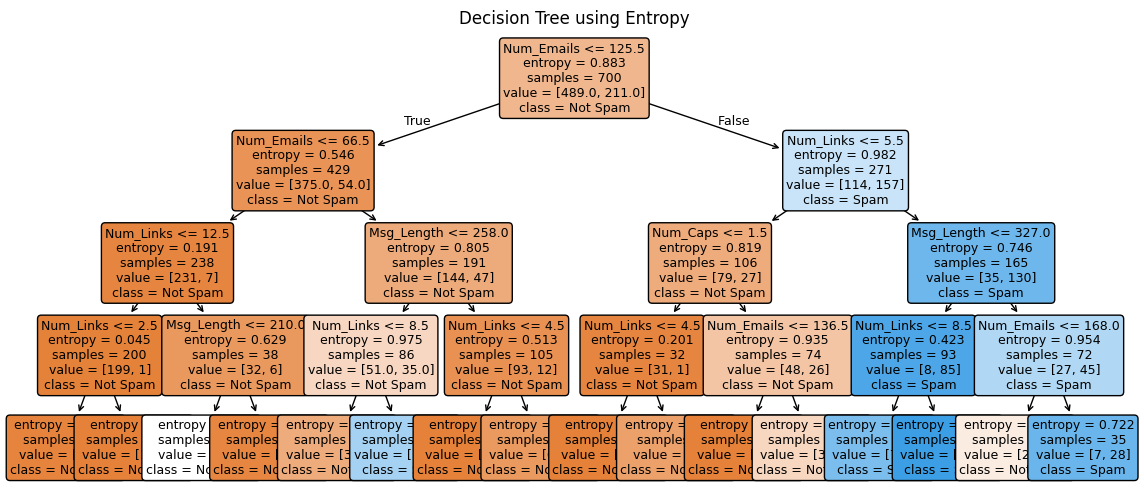

In [9]:
# 6. Visualize the Tree

plt.figure(figsize=(14,6))
plot_tree(model, feature_names=x.columns,class_names=['Not Spam', 'Spam'],filled=True,
          rounded=True, fontsize=9)
plt.title("Decision Tree using Entropy")
plt.show()

In [10]:
# 7. Print the actual decision rules
tree_rules = export_text(model, feature_names=list(x.columns))
print("\n Decision Tree Rules: \n")
print(tree_rules)


 Decision Tree Rules: 

|--- Num_Emails <= 125.50
|   |--- Num_Emails <= 66.50
|   |   |--- Num_Links <= 12.50
|   |   |   |--- Num_Links <= 2.50
|   |   |   |   |--- class: 0
|   |   |   |--- Num_Links >  2.50
|   |   |   |   |--- class: 0
|   |   |--- Num_Links >  12.50
|   |   |   |--- Msg_Length <= 210.00
|   |   |   |   |--- class: 0
|   |   |   |--- Msg_Length >  210.00
|   |   |   |   |--- class: 0
|   |--- Num_Emails >  66.50
|   |   |--- Msg_Length <= 258.00
|   |   |   |--- Num_Links <= 8.50
|   |   |   |   |--- class: 0
|   |   |   |--- Num_Links >  8.50
|   |   |   |   |--- class: 1
|   |   |--- Msg_Length >  258.00
|   |   |   |--- Num_Links <= 4.50
|   |   |   |   |--- class: 0
|   |   |   |--- Num_Links >  4.50
|   |   |   |   |--- class: 0
|--- Num_Emails >  125.50
|   |--- Num_Links <= 5.50
|   |   |--- Num_Caps <= 1.50
|   |   |   |--- Num_Links <= 4.50
|   |   |   |   |--- class: 0
|   |   |   |--- Num_Links >  4.50
|   |   |   |   |--- class: 0
|   |   |--- Num_Cap

In [13]:
# What if we use gini impurity?

models = {
    "Entropy": DecisionTreeClassifier(criterion="entropy", max_depth=4, random_state=42),
    "Gini": DecisionTreeClassifier(criterion="gini", max_depth=4, random_state=42)
}

for name, m in models.items():
    m.fit(x_train, y_train)
    pred = m.predict(x_test)
    print(f'\n=== {name} Tree accuracy ===')
    print(classification_report(y_test, pred))

#What if we use different max_depth values? (underfitting vs overfitting)

for d in [2, 3, 4, 6, None]:
    model = DecisionTreeClassifier(max_depth=d, random_state=42)
    model.fit(x_train, y_train)
    acc = model.score(x_train, y_train)
    print(f'Max Depth = {d}, Test Accuracy={acc:.3f}')

for d in [2, 3, 4, 6, None]:
    model = DecisionTreeClassifier(criterion='entropy', max_depth=d, random_state=42)
    model.fit(x_train, y_train)
    acc = model.score(x_train, y_train)
    print(f'Max Depth = {d}, Test Accuracy={acc:.3f}')


=== Entropy Tree accuracy ===
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       215
           1       0.80      0.60      0.68        85

    accuracy                           0.84       300
   macro avg       0.83      0.77      0.79       300
weighted avg       0.84      0.84      0.84       300


=== Gini Tree accuracy ===
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       215
           1       0.83      0.64      0.72        85

    accuracy                           0.86       300
   macro avg       0.85      0.79      0.81       300
weighted avg       0.86      0.86      0.85       300

Max Depth = 2, Test Accuracy=0.834
Max Depth = 3, Test Accuracy=0.834
Max Depth = 4, Test Accuracy=0.864
Max Depth = 6, Test Accuracy=0.910
Max Depth = None, Test Accuracy=1.000
Max Depth = 2, Test Accuracy=0.834
Max Depth = 3, Test Accuracy=0.834
Max Depth = 4, Test Accuracy=0.853
Max 

In [ ]:
# K-fold cross validation for possibly more accuracy

from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, x, y, cv=5)
print("Cross-validation accuracy:", scores)
print("Average:", scores.mean())

Cross-validation accuracy: [0.835 0.825 0.79  0.825 0.825]
Average: 0.8200000000000001
